# Analiza wyników z nowożytnych Igrzysk Olimpijskich
###### Michał Banaszczak 311175
---

#### Załadowanie potrzebnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram

In [148]:
allScores = pd.read_csv('../data/scoresFromAllGames.csv', sep=';')

winterScores = allScores.loc[allScores['Type'] == 'Winter']
summerScores = allScores.loc[allScores['Type'] == 'Summer']

print(f'Wszystkie wiersze: {allScores.shape[0]}\nWiersze z letnich IO: {summerScores.shape[0]}\nWiersze z zimowych IO: {winterScores.shape[0]}')
allScores.head()

Wszystkie wiersze: 162473
Wiersze z letnich IO: 118157
Wiersze z zimowych IO: 44316


,Host,Year,Type,Sport,Event,Place,Country,Participant,Result
0,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,1.0,Austria,Johannes Strolz,151.43
1,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,2.0,Norway,Aleksander Aamodt Kilde,152.02
2,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,3.0,Canada,James Crawford,152.11
3,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,4.0,Switzerland,Justin Murisier,152.29
4,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,5.0,Austria,Marco Schwarz,152.71


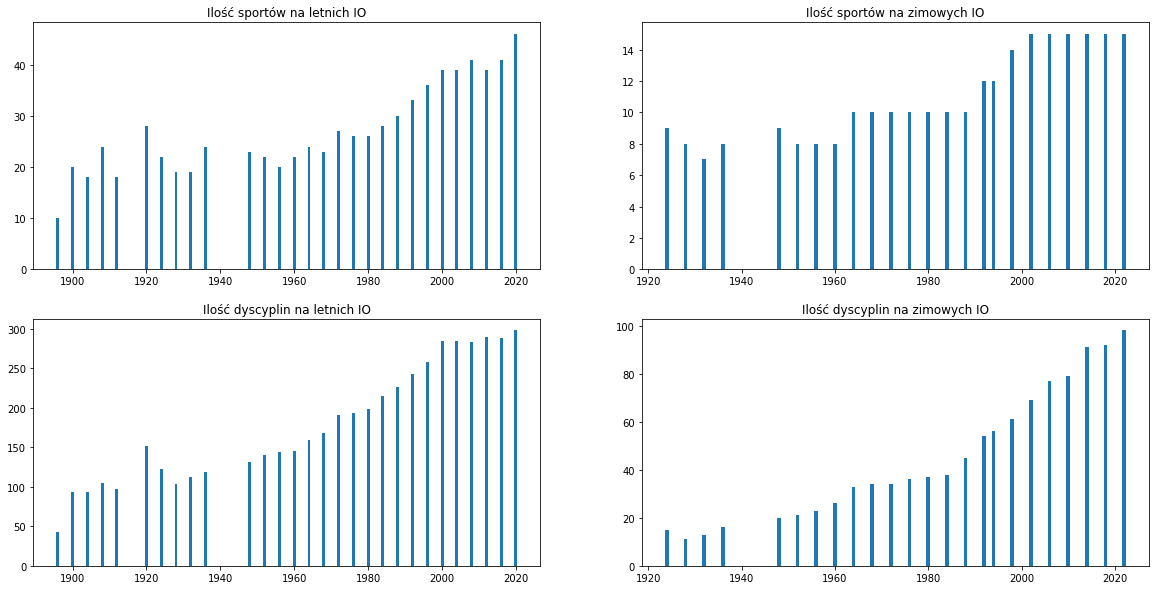

In [199]:
def DFdistinctColumnByYear(inScoresDF, inCol):
	outDict = dict()
	for year in set(inScoresDF['Year']):
		outDict[year] = len(set(inScoresDF[~inScoresDF[inCol]
							.where(inScoresDF['Year'] == year).isnull()][inCol]))

	return pd.DataFrame.from_dict(data=outDict, orient='index', columns=[f'nOf{inCol}s']).sort_index()
	
sSports = DFdistinctColumnByYear(summerScores, 'Sport')
wSports = DFdistinctColumnByYear(winterScores, 'Sport')
sEvents = DFdistinctColumnByYear(summerScores, 'Event')
wEvents = DFdistinctColumnByYear(winterScores, 'Event')


plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.bar(sSports.index, sSports['nOfSports'])
plt.title('Ilość sportów na letnich IO')
plt.subplot(2,2,2)
plt.bar(wSports.index, wSports['nOfSports'])
plt.title('Ilość sportów na zimowych IO')
plt.subplot(2,2,3)
plt.bar(sEvents.index, sEvents['nOfEvents'])
plt.title('Ilość dyscyplin na letnich IO')
plt.subplot(2,2,4)
plt.bar(wEvents.index, wEvents['nOfEvents'])
plt.title('Ilość dyscyplin na zimowych IO')
plt.show()

#### letnie IO
roznorodnosc sportow wzrosla ponad czterokrotnie w od pierwszych nowozytnuch IO
roznorodnosc poszczegolnych dyscyplin wzrosla szesciokrotnie na przestrzeni ubieglego wieku -> dla istniejacych juz sportow pojawialo sie co raz wiecej nowych dyscyplin
trend ten tak naprawde jednak zaczal sie dopiero po wojnie, przez pierwsze 10 edycji nie obeswujemy specjalnego wzrosu
#### ziomowe IO
ilosc sportow na zimowych IO byla przedzialami stala, tylko w pewnych momentach zwiekszano liczbe, jest ich jednak zdecydowanie mniej niz na letnich igrzystakch.

### ciekawe rzeczy do policzenia
1. ilosc zlotych medali w zaleznosci od panstwa
2. ilosc wszystkich medalistow w zaleznosci od panstwa
3. panstwa bez zadnych medalistow
4. ilosc DNS oraz DNF w czasie
5. skutki (spadek w wynikach) dla rosyjskich zawodnikow po aferze dopingowej
6. wyniki panstw ZSRR przed i po jego rozpadzie
7. wyniki panstw jugoslawii przed i po rozpadzie
8. wyniki czechoslowacji w porownaniu do wynikow czech i slowacji (wyniki = ilosc medalistow / srednie miejsce)
9. ilosc medali wzgledem kontynentu

jak starczy czasu to 1-4 lacznie i w rozroznieniu na lato/zima

Złote medale zdobyte przez polskich sportowców:
+ w letnich IO: 88
+ w zimowych IO: 7
+ łącznie: 95
47.64492753623188
18


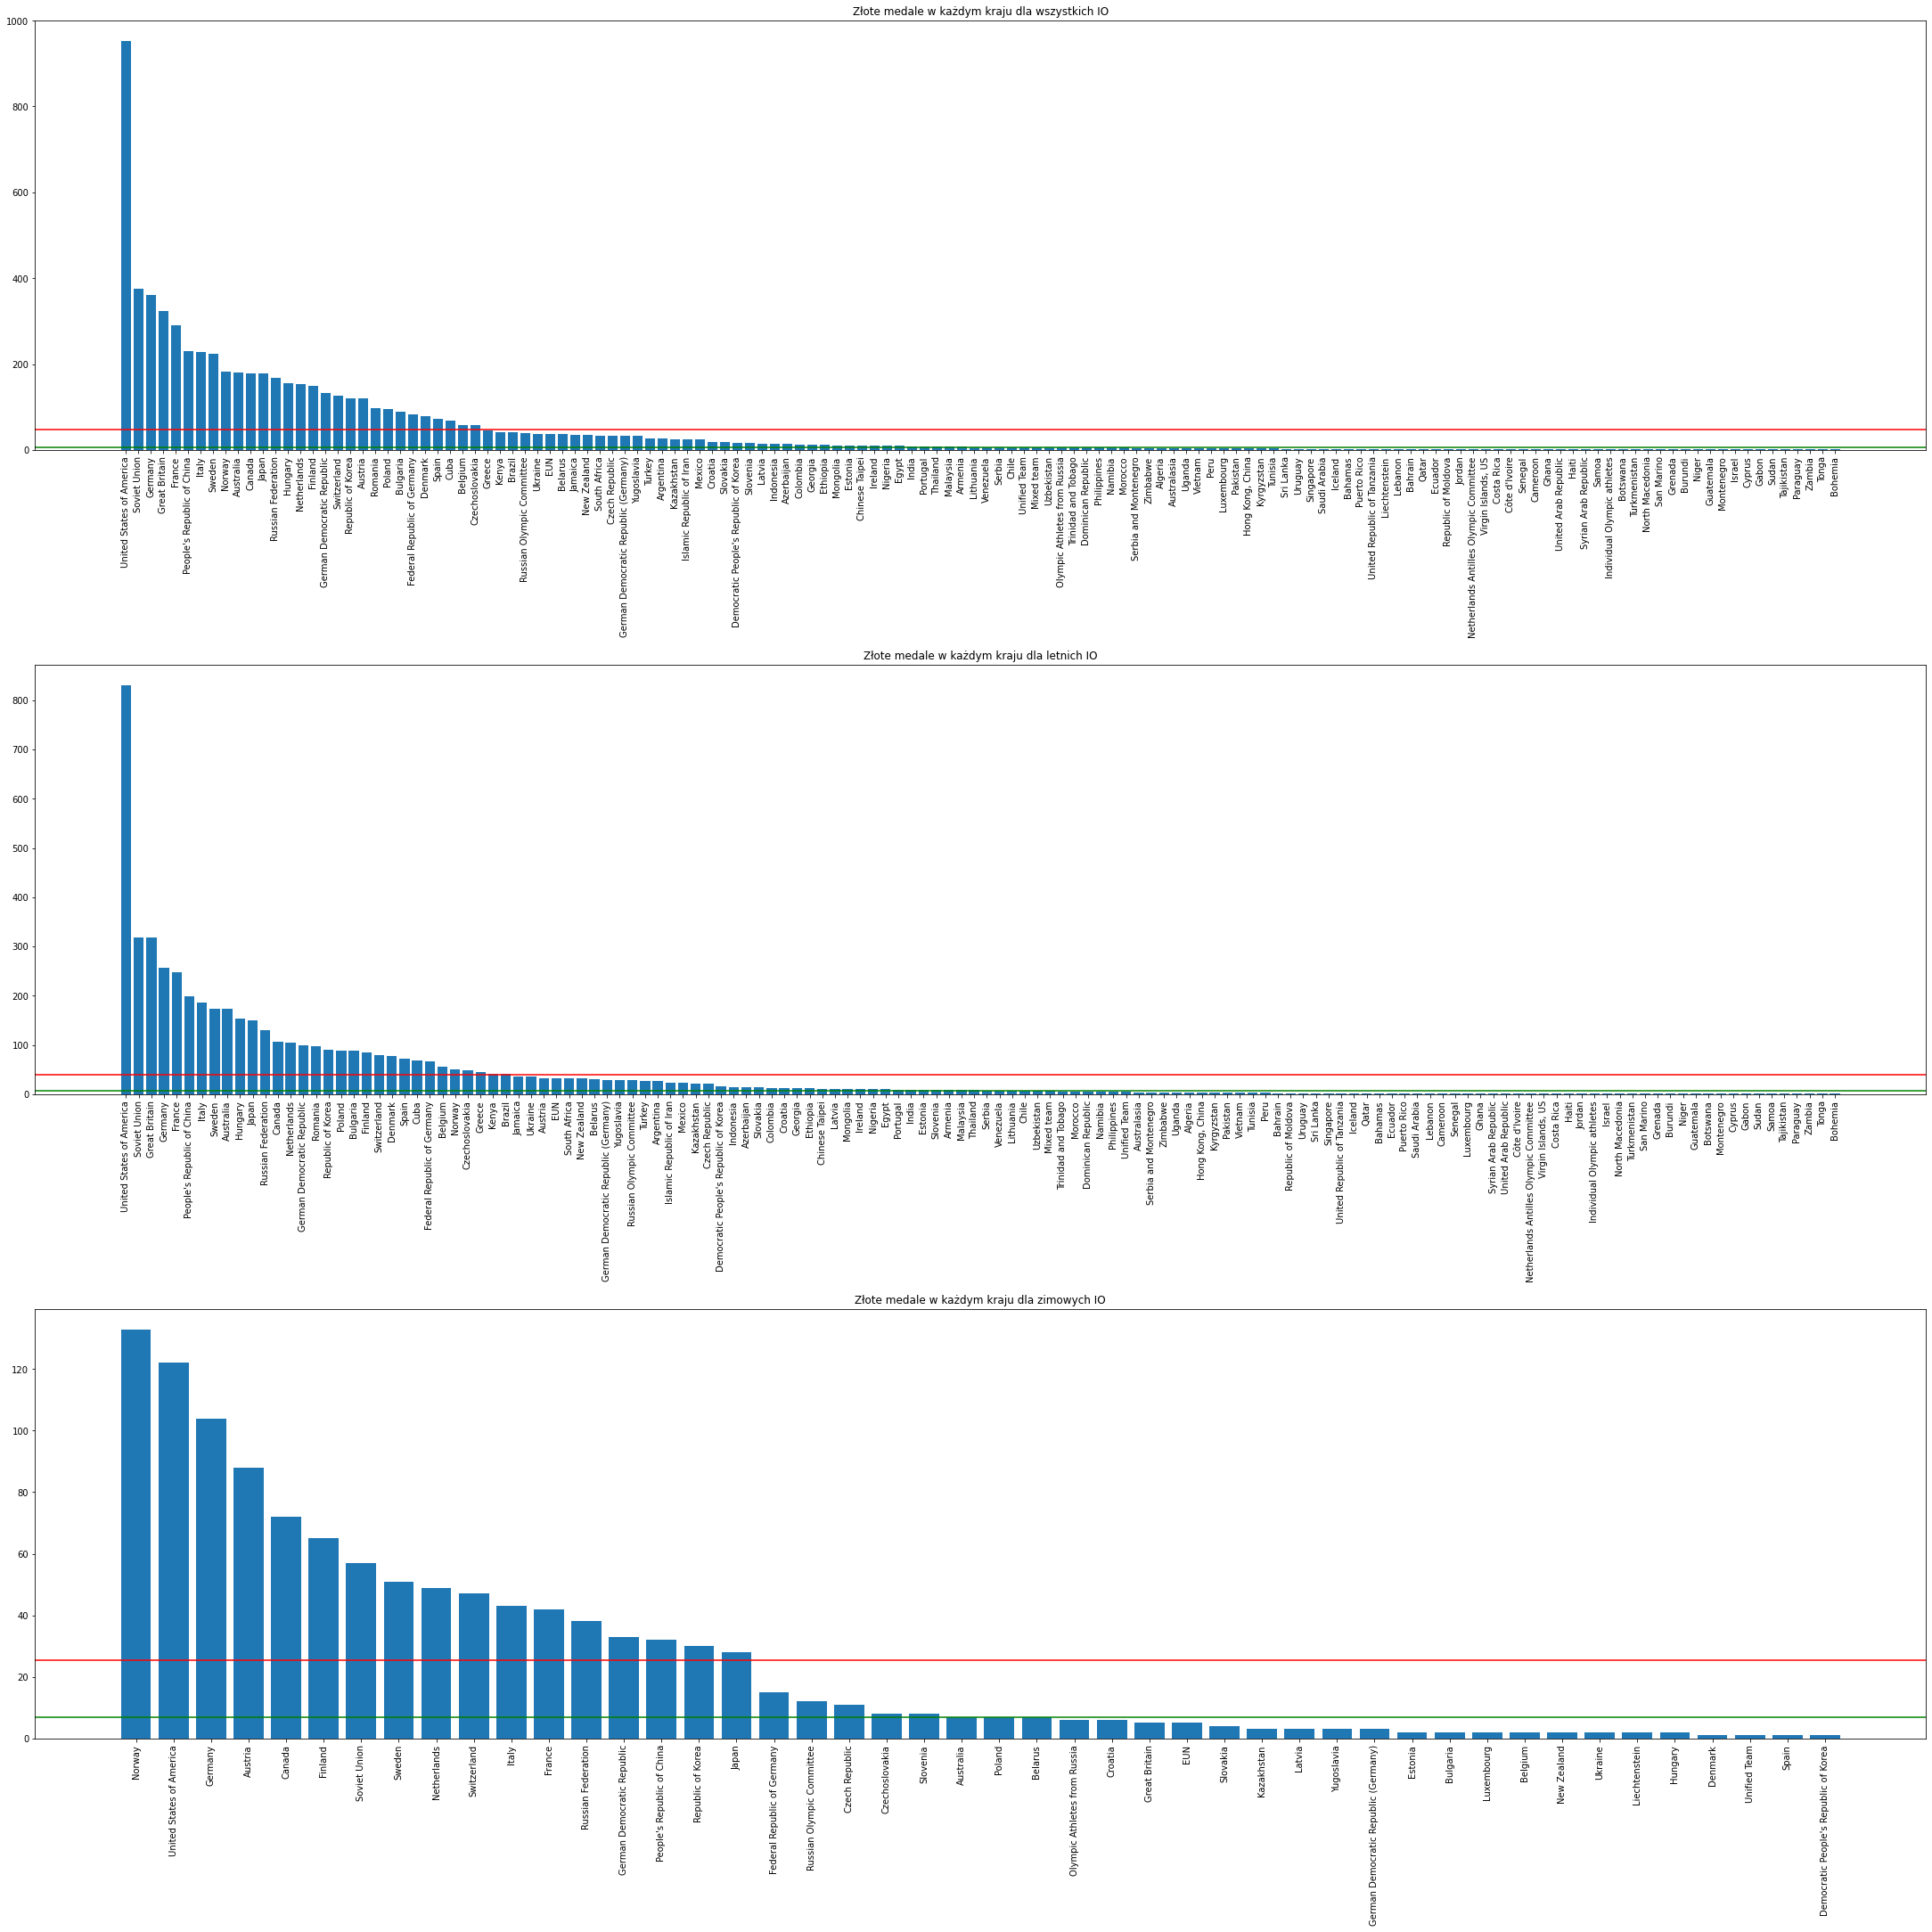

In [200]:
def goldMedalsByCountry(inScoresDF, place):
	return inScoresDF[~inScoresDF.Country.where(inScoresDF.Place == place).isnull()].Country.value_counts()

p = 2
aGoldByCountry = goldMedalsByCountry(allScores, p)
sGoldByCountry = goldMedalsByCountry(summerScores, p)
wGoldByCountry = goldMedalsByCountry(winterScores, p)

print(f'Złote medale zdobyte przez polskich sportowców:\n+ w letnich IO: {sGoldByCountry.Poland}\n+ w zimowych IO: {wGoldByCountry.Poland}\n+ łącznie: {aGoldByCountry.Poland}')

plt.figure(figsize = (30,30), constrained_layout = True)
for i, df in enumerate([aGoldByCountry, sGoldByCountry, wGoldByCountry]):
	plt.subplot(3,1,i+1)
	plt.bar(df.keys(), df.values)
	plt.xticks(rotation=90)
	if i == 0: 	 plt.title('Złote medale w każdym kraju dla wszystkich IO')
	elif i == 1: plt.title('Złote medale w każdym kraju dla letnich IO')
	else: 		 plt.title('Złote medale w każdym kraju dla zimowych IO')
	plt.axhline(y = df.median(), color = 'green', linestyle = '-')
	plt.axhline(y = df.mean(), color = 'red', linestyle = '-')
	# green -> median, red -> mean
plt.show()

Wszystkie medale zdobyte przez polskich sportowców:
+ w letnich IO: 298
+ w zimowych IO: 23
+ łącznie: 321
72.875


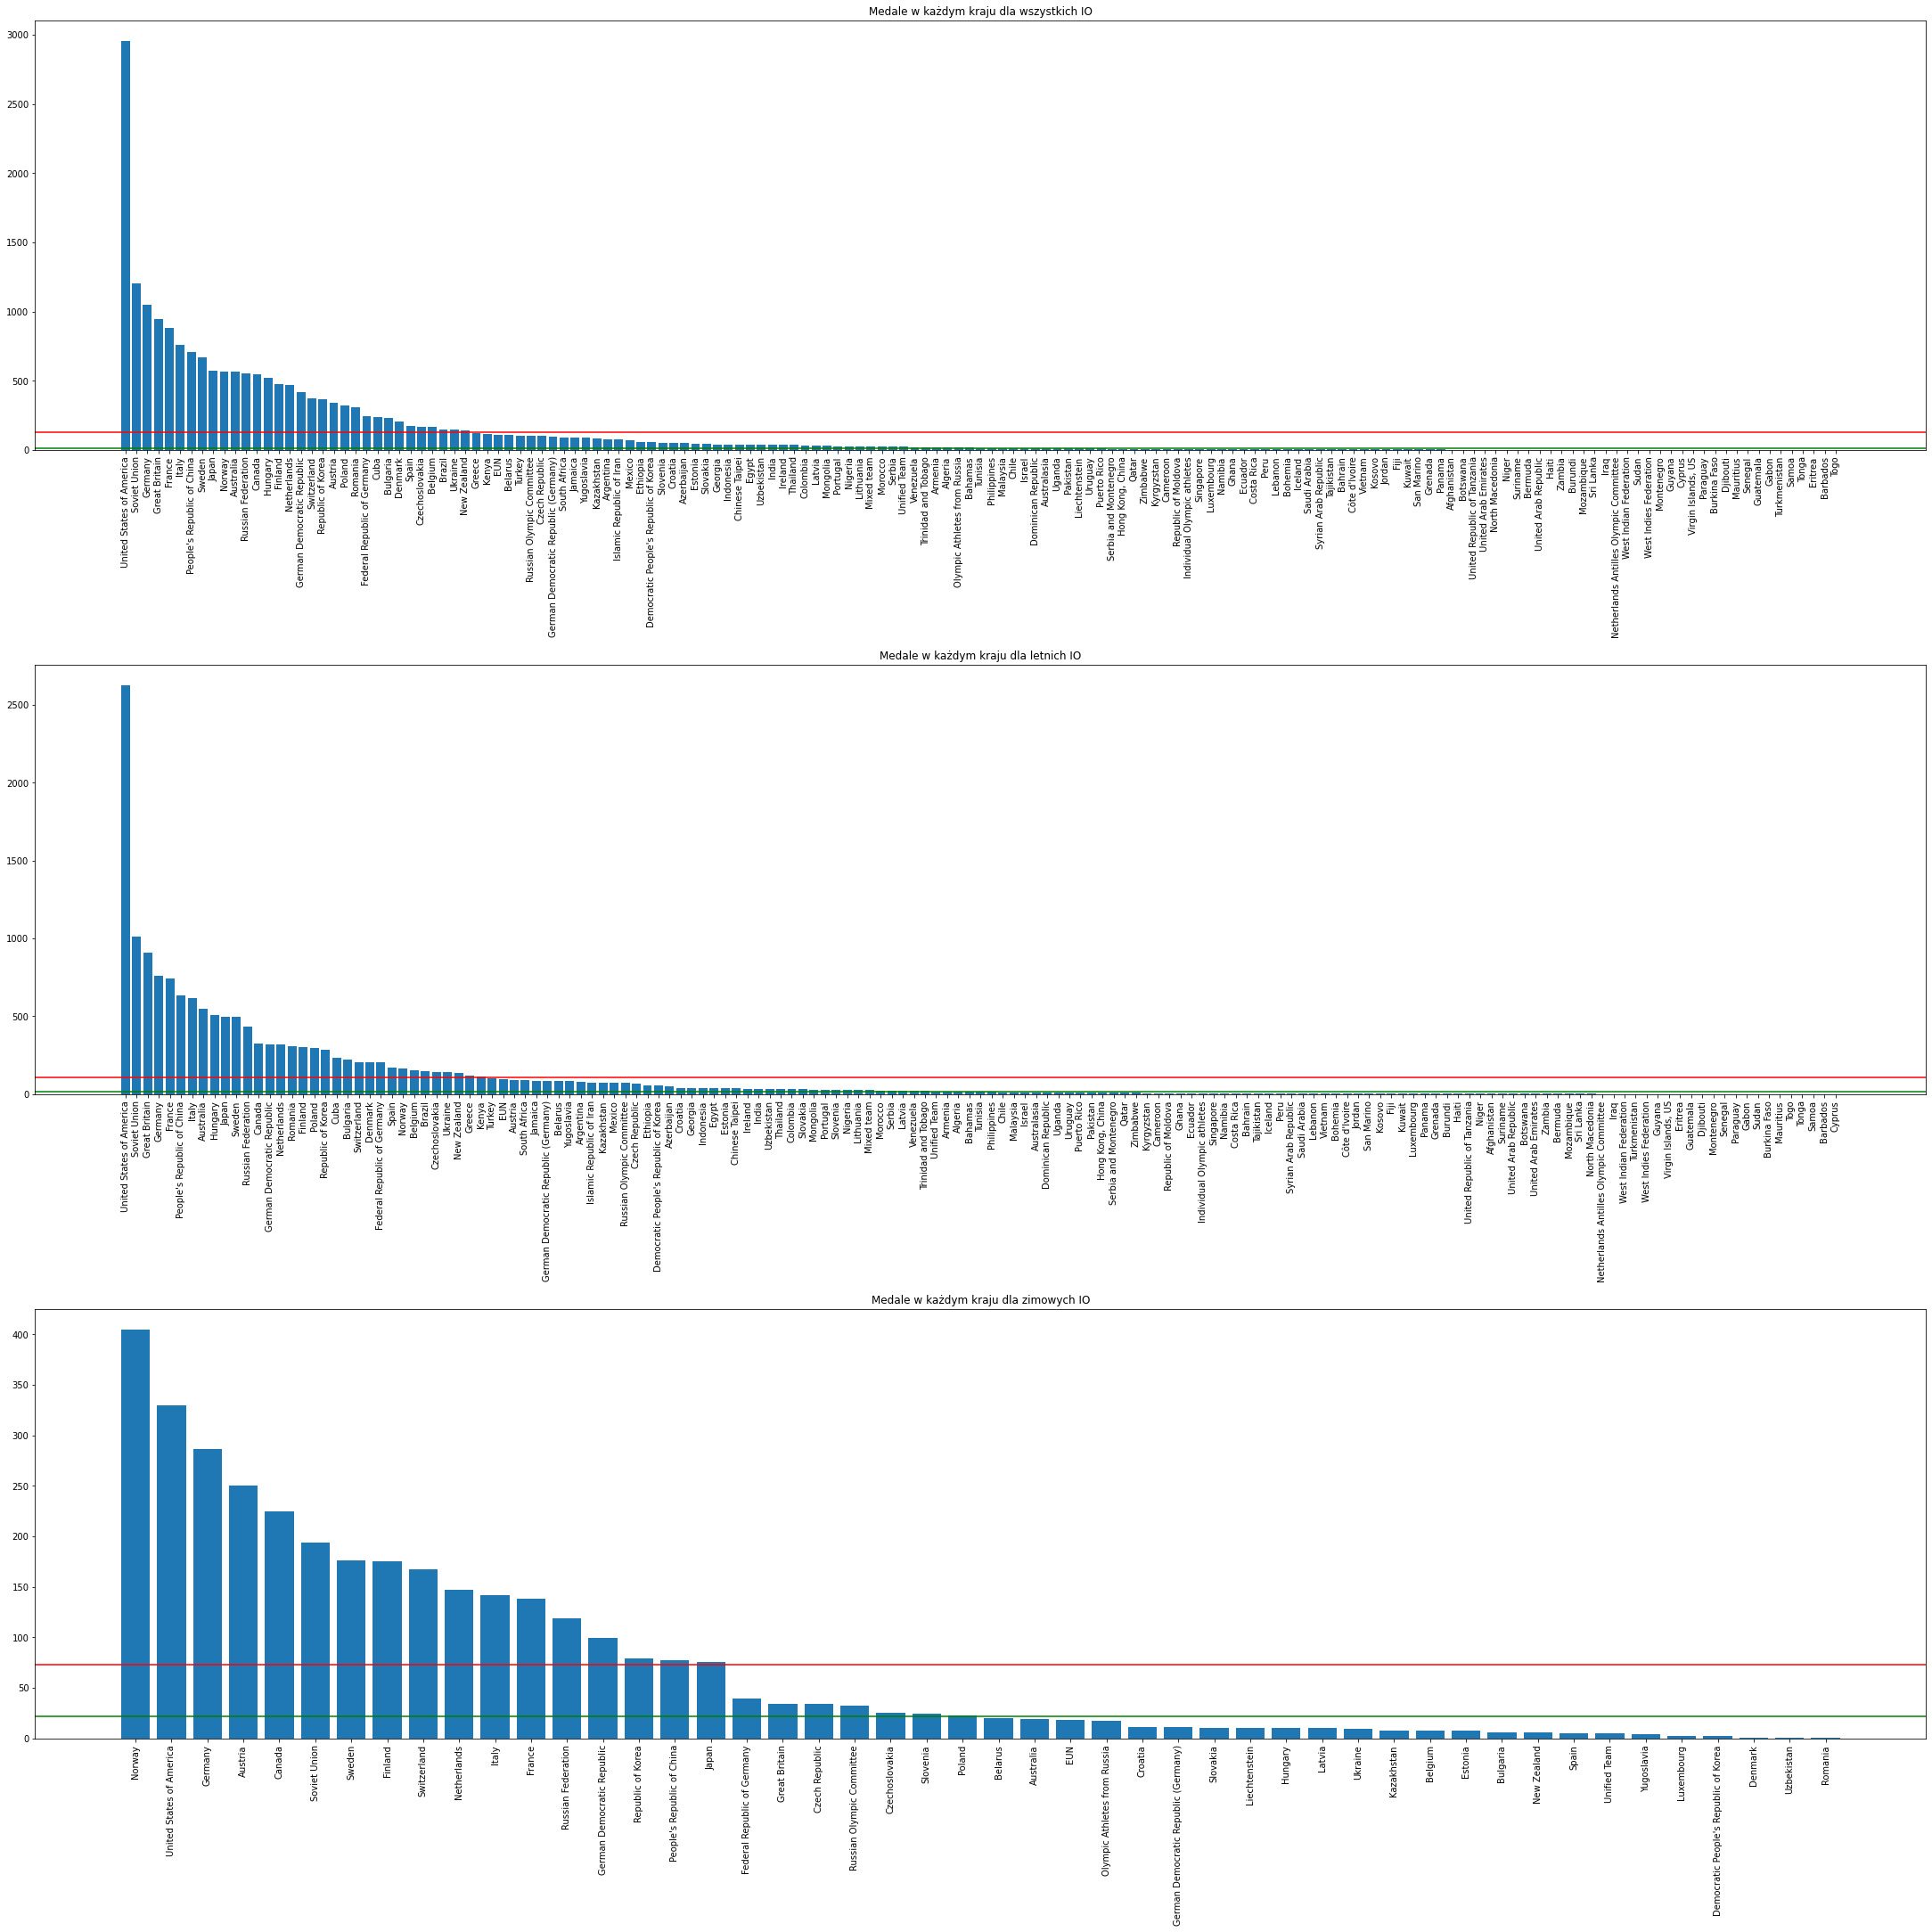

In [201]:
def medalsByCountry(inScoresDF):
	return inScoresDF[~inScoresDF.Country.where((inScoresDF.Place >= 1) & (inScoresDF.Place <= 3)).isnull()].Country.value_counts()

aByCountry = medalsByCountry(allScores)
sByCountry = medalsByCountry(summerScores)
wByCountry = medalsByCountry(winterScores)

print(f'Wszystkie medale zdobyte przez polskich sportowców:\n+ w letnich IO: {sByCountry.Poland}\n+ w zimowych IO: {wByCountry.Poland}\n+ łącznie: {aByCountry.Poland}')
print(wByCountry.mean())

plt.figure(figsize = (30,30), constrained_layout = True)
for i, df in enumerate([aByCountry, sByCountry, wByCountry]):
	plt.subplot(3,1,i+1)
	plt.bar(df.keys(), df.values)
	plt.xticks(rotation=90)
	if i == 0: 	 plt.title('Medale w każdym kraju dla wszystkich IO')
	elif i == 1: plt.title('Medale w każdym kraju dla letnich IO')
	else: 		 plt.title('Medale w każdym kraju dla zimowych IO')
	plt.axhline(y = df.median(), color = 'green', linestyle = '-')
	plt.axhline(y = df.mean(), color = 'red', linestyle = '-')
	# green -> median, red -> mean
plt.show()

In [208]:
CountriesWithMedals = dict()
CountriesWithoutMedals = []

allScores.iloc[0,6]

for i in range(allScores.shape[0]):
	if allScores.iloc[i, 5] in [1,2,3]:
		c = allScores.iloc[i, 6]
		CountriesWithMedals[c] = CountriesWithMedals.get(c, 0) + 1

for c in allScores.Country.unique():
	if CountriesWithMedals.get(c, 0) == 0:
		CountriesWithoutMedals.append(c)
CountriesWithoutMedals.sort()

print(f'Wszystkich państw {len(allScores.Country.unique())}')
print(f'Państw bez medali {len(CountriesWithoutMedals)} ({format(len(CountriesWithoutMedals) / len(allScores.Country.unique()) * 100, ".2f")}%)')
print(CountriesWithoutMedals) # print more concise than return value

Wszystkich państw 239
Państw bez medali 82 (34.31%)
['Albania', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Aruba', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brunei Darussalam', 'Cambodia', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cook Islands', 'Democratic Republic of Timor-Leste', 'Democratic Republic of the Congo', 'Dominica', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Federated States of Micronesia', 'Federation of Malaya', 'Gambia', 'Guam', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Independent Olympic Athletes', 'Kiribati', 'Korea Team', "Lao People's Democratic Republic", 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaya', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Monaco', 'Myanmar', 'Nauru', 'Nepal', 'Netherlands Antilles', 'Newfoundland', 'Nicaragua', 'North Borneo', 'Oman', 'Palau', 'Palestine', 'Papua New Guinea', 'Refugee Olympic Te

In [203]:
allScores.loc[(allScores.Year == 1896) & (allScores.Event == '1200m freestyle men')]

,Host,Year,Type,Sport,Event,Place,Country,Participant,Result
162380,Athens,1896,Summer,Swimming,1200m freestyle men,1.0,Hungary,Alfred Hajos,1102.20
162381,Athens,1896,Summer,Swimming,1200m freestyle men,2.0,Greece,Ioannis Andreou,1263.40
162382,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,United States of America,Gardner Williams,NaN
162383,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,N. Katravas,NaN
162384,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,Efstathios Khorafas,NaN
162385,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Austria,Paul Neumann,Did not finish
162386,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Denmark,Holger Nielsen,Did not start
162387,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Denmark,Charles Winckler,Did not start
162388,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,France,Alphonse Grisel,Did not start
162389,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,D. Frangopoulos,Did not start


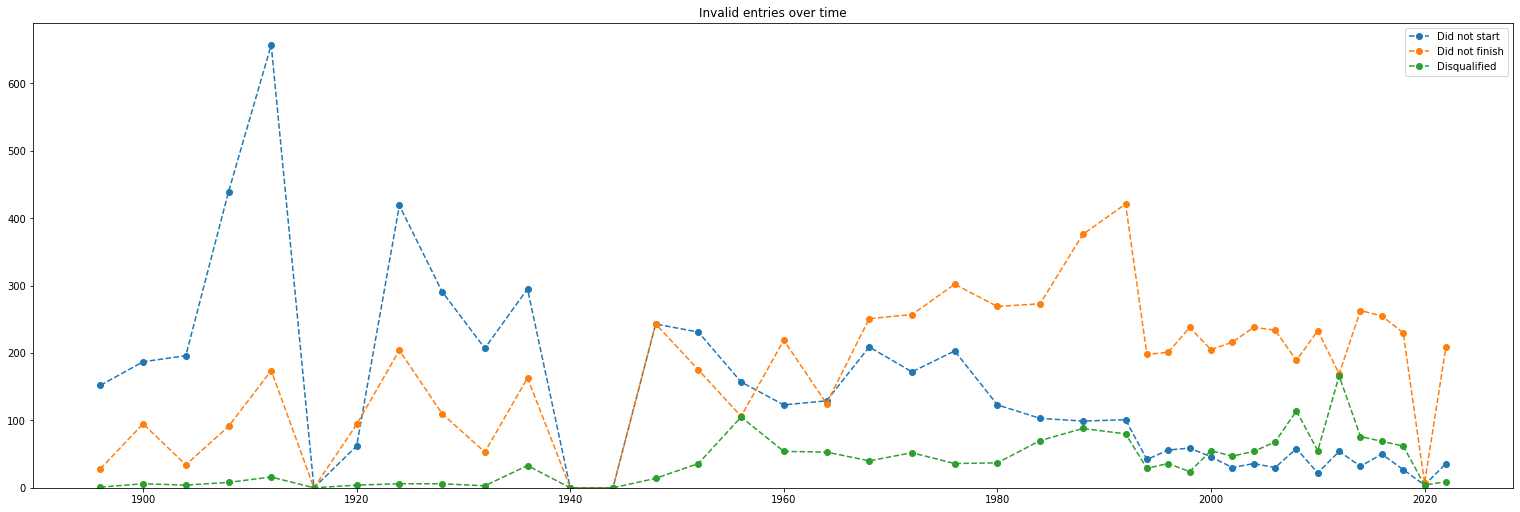

In [227]:
baseDF = allScores
dns = baseDF[~baseDF.where(baseDF.Result == 'Did not start').isnull()].Year.value_counts()
dnf = baseDF[~baseDF.where(baseDF.Result == 'Did not finish').isnull()].Year.value_counts()
dis = baseDF[~baseDF.where(baseDF.Result == 'Disqualified').isnull()].Year.value_counts()
nonexistent = pd.Series([0,0,0], index=[1916,1940,1944])

# dns = dns.sort_index()
# dnf = dnf.sort_index()
# dis = dis.sort_index()

plt.figure(figsize = (21,7), constrained_layout = True)
plt.title('Invalid entries over time')

for df in [dns, dnf, dis]:
	df = pd.concat([df, nonexistent])		# adding values for non-existent games
	df = df.sort_index()					# sorting by index; sorted by value by default
	plt.plot(df.index, df.values, marker='o', linestyle='--')	# adding onto one plot

plt.legend(['Did not start', 'Did not finish', 'Disqualified'])
plt.ylim(ymin=0)
plt.show()

In [246]:
# https://en.wikipedia.org/wiki/Doping_in_Russia
byear = 1994 # wspolczesna Rosja 1994-2016
wszyscyPrzed = allScores.loc[allScores.Country == 'Russian Federation'].loc[allScores.Year >= byear].shape[0]
wszyscyPo = allScores.loc[allScores.Country == 'Olympic Athletes from Russia'].shape[0]
wszyscyPo += allScores.loc[allScores.Country == 'Russian Olympic Committee'].shape[0]

medalisciPrzed = allScores.loc[allScores.Country == 'Russian Federation'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].loc[allScores.Year >= byear].shape[0]
medalisciPo = allScores.loc[allScores.Country == 'Olympic Athletes from Russia'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0]
medalisciPo += allScores.loc[allScores.Country == 'Russian Olympic Committee'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0]

print(f'Przed wykluczeniem Rosji z udziału w IO (od {byear}): {medalisciPrzed} medalistów na {wszyscyPrzed} uczestników - {format(medalisciPrzed / wszyscyPrzed * 100, ".2f")}%')
print(f'Po wykluczeniu Rosji z udziału w IO: {medalisciPo} medalistów na {wszyscyPo} uczestników - {format(medalisciPo / wszyscyPo * 100, ".2f")}%')

#ew dodac jeszcze wykres od czasu

Przed wykluczeniem Rosji z udziału w IO (od 1994): 545 medalistów na 2917 uczestników - 18.68%
Po wykluczeniu Rosji z udziału w IO: 120 medalistów na 666 uczestników - 18.02%


Text(0.5, 1.0, 'Wpływ rozpadu ZSRR na sumaryczne wyniki sportowe państw członkowskich')

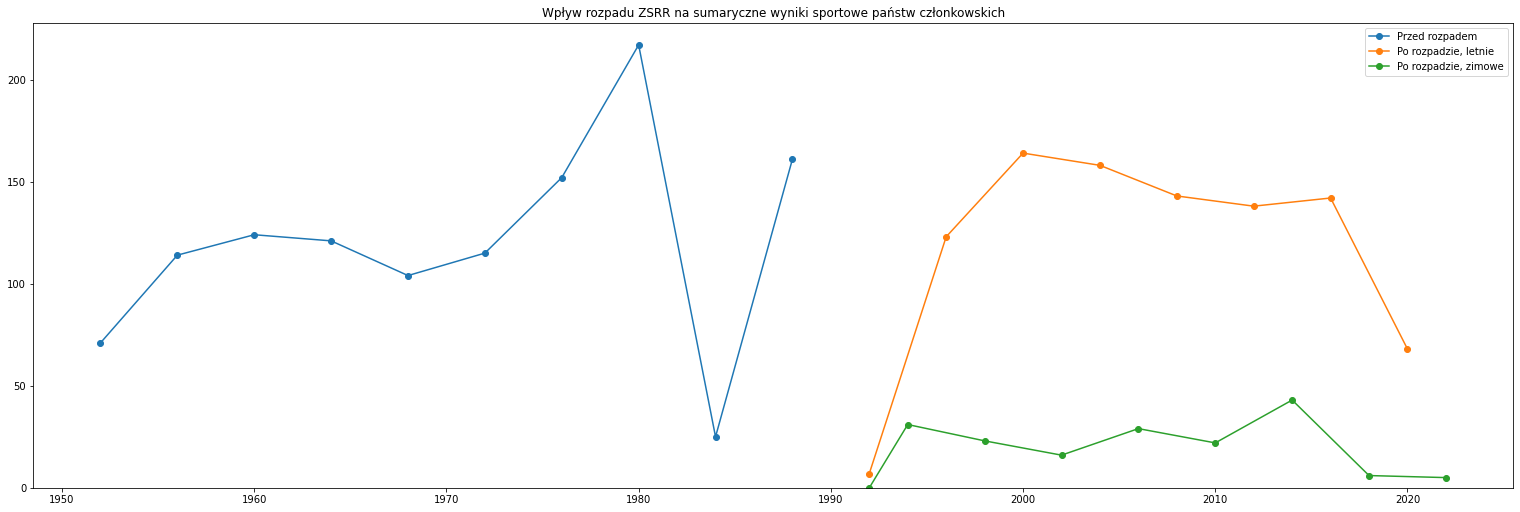

In [288]:
# list of countries -> https://en.wikipedia.org/wiki/Dissolution_of_the_Soviet_Union#Chronology_of_declarations
# population 1 -> https://en.wikipedia.org/wiki/Demographics_of_the_Soviet_Union#Ethnic_groups

# populacja poszczegolnych panstw czlonkowskich ZSSR
USSRpopulation = 286.717 # w milionach, stan na rok 1989 (1988 to ostatnie IO w ktorych ZSRR bralo udzial)
formerUSSRpops = {	'Russian Federation': 147.386, 'Ukraine': 51.704, 'Belarus': 10.200,
					'Republic of Moldova': 4.341, 'Azerbaijan': 7.029, 'Georgia': 5.449,
					'Armenia': 3.283, 'Uzbekistan': 19.906, 'Kazakhstan': 16.538,
					'Tajikistan': 5.112, 'Kyrgyzstan': 4.291, 'Turkmenistan': 3.534,
					'Lithuania': 3.690, 'Latvia': 2.681, 'Estonia': 1.573  }

# sprawdzam, czy rozpad ZSRR wplynal na sume medali zdobywanych przez panstwa czlonkowskie
# ilosc medali zdobywanych przez ZSRR na kazdych IO przez rozpadem 
USSRmedalsByYear = allScores.loc[allScores.Country == 'Soviet Union'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].Year.value_counts().sort_index()

# ilosc medali zdobytych sumarycznie przez panstwa czlonkowskie na kazdych IO po rozpadzie
# dodatkowo od 1992 jest 2-letni offset miedzy letnimi a zimowymi igrzyskami

def createSeriesMedalsByYearByType(t):
	# create Series with proper year indexing including type (didn't want to type by hand and overcomplicated a bit, i do know)
	gamesAfterDissolution = allScores.loc[allScores.Year > 1988].loc[allScores.Type == t].Year.value_counts().sort_index().index
	# create series based on said indexing
	NEWmedalsByYear = pd.Series([0] * len(gamesAfterDissolution), index=gamesAfterDissolution)

	for c in list(formerUSSRpops.keys()):
		for y in list(gamesAfterDissolution):
			nOfMedByCandY = (allScores.loc[allScores.Country == c]								# where specified country
							.loc[allScores.Year == y]											# where past 1988
							.loc[allScores.Type == t]											# summer / winter
							.loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0])		# where 1st trough 3rd place, shape[0] == count of rows
			NEWmedalsByYear[y] += nOfMedByCandY
	return NEWmedalsByYear

NEWmedalsByYearSummer = createSeriesMedalsByYearByType('Summer')
NEWmedalsByYearWinter = createSeriesMedalsByYearByType('Winter')

# wykres sumy medali przed i po rozpadzie w czasie
plt.figure(figsize = (21,7), constrained_layout = True)
plt.plot(USSRmedalsByYear.index, USSRmedalsByYear.values, marker='o')
plt.plot(NEWmedalsByYearSummer.index, NEWmedalsByYearSummer.values, marker='o')
plt.plot(NEWmedalsByYearWinter.index, NEWmedalsByYearWinter.values, marker='o')
plt.ylim(ymin=0)
plt.legend(['Przed rozpadem', 'Po rozpadzie, letnie', 'Po rozpadzie, zimowe'])
plt.title('Wpływ rozpadu ZSRR na sumaryczne wyniki sportowe państw członkowskich')

# jak widać, pozytywny
# po 2016 widac jednak spadek bo w dany wykres nie sa wlaczone wyniki ROC oraz OAfR, juz mi sie nie chcialo

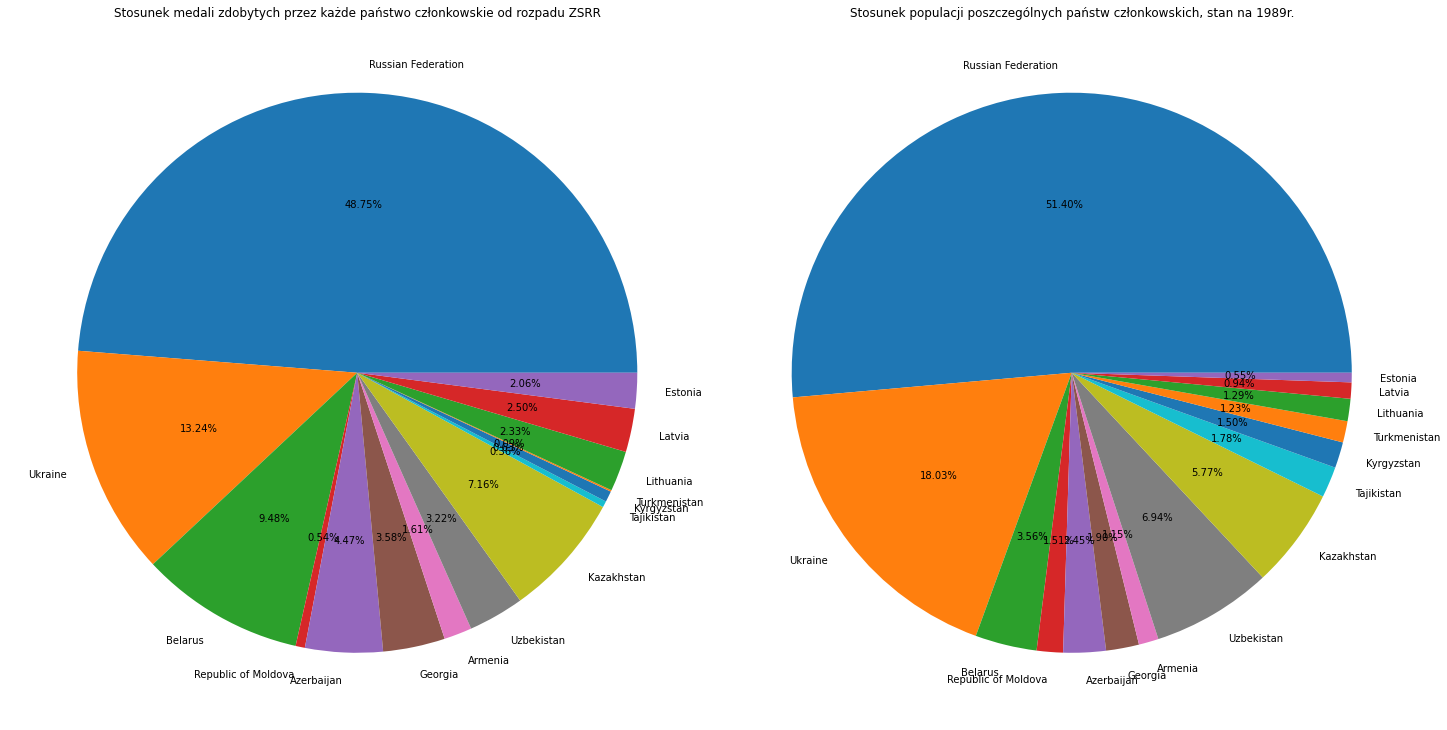

In [302]:
medalsByPostUSSRCountry = pd.Series([0] * len(formerUSSRpops.keys()), index=formerUSSRpops.keys())

for c in formerUSSRpops.keys():
	nOfmed = (allScores.loc[allScores.Country == c]								# dla danego kraju
					   .loc[(allScores.Place >= 1) & (allScores.Place <= 3)]	# medalisci
					   .loc[allScores.Year > 1988]								# po rozpadzie ZSRR
					   .shape[0])												# ilosc wierszy
	medalsByPostUSSRCountry[c] = nOfmed

plt.figure(figsize = (20,10), constrained_layout = True, facecolor='white')
plt.subplot(1,2,1)
plt.pie(medalsByPostUSSRCountry, labels=medalsByPostUSSRCountry.index, autopct='%1.2f%%')
plt.title('Stosunek medali zdobytych przez każde państwo członkowskie od rozpadu ZSRR')
plt.subplot(1,2,2)
plt.pie(list(formerUSSRpops.values()), labels=list(formerUSSRpops.keys()), autopct='%1.2f%%')
plt.title('Stosunek populacji poszczególnych państw członkowskich, stan na 1989r.')
plt.show()